In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
from env import hostname, user, password
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

import acquire as a

In [16]:
#full circle to make sure it works
sales_df =  a.get_store_data()

In [3]:
sales_df.head().T

store_id,1,1,1,1,1
item_id,1,1,1,1,1
sale_id,1,2,3,4,5
sale_date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
sale_amount,13,11,14,13,10
item_upc14,35200264013,35200264013,35200264013,35200264013,35200264013
item_upc12,35200264013,35200264013,35200264013,35200264013,35200264013
item_brand,Riceland,Riceland,Riceland,Riceland,Riceland
item_name,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice
item_price,0.84,0.84,0.84,0.84,0.84
store_address,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy


# Data Preparation

Using your store items data:

1. Convert date column to datetime format.

In [4]:
sales_df.sale_date = sales_df.sale_date.astype('datetime64')

In [5]:
sales_df.head(3)

,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
store_id,,,,,,,,,,,,,
1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


2. Plot the distribution of sale_amount and item_price.

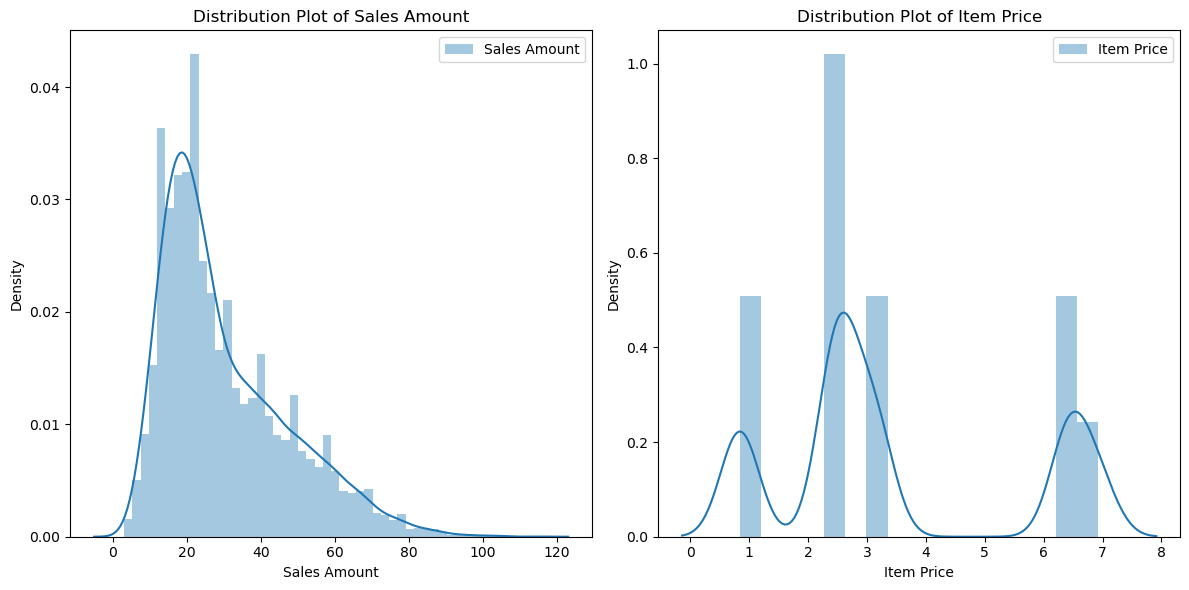

In [6]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of sale_amount 
sns.distplot(sales_df['sale_amount'], label='Sales Amount', ax=axes[0])

# Plot the distribution of item_price 
sns.distplot(sales_df['item_price'], label='Item Price', ax=axes[1])

# Set labels and title for each subplot
axes[0].set_xlabel('Sales Amount')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution Plot of Sales Amount')

axes[1].set_xlabel('Item Price')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution Plot of Item Price')

# Show the legend for both subplots
axes[0].legend()
axes[1].legend()

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plot
plt.show()


3. Set the index to be the datetime variable.

In [7]:
sales_df = sales_df.set_index('sale_date')

In [8]:
sales_df.head(3)

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,
2013-01-01,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
sales_df['month'] = sales_df.index.month

In [10]:
sales_df.head(3)

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1
2013-01-02,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1
2013-01-03,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1


In [11]:
sales_df['day_of_week'] = sales_df.index.day_of_week

In [12]:
sales_df.head(3)

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,
2013-01-01,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1
2013-01-02,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2
2013-01-03,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [13]:
sales_df['sales_total'] = sales_df.sale_amount * sales_df.item_price

In [14]:
sales_df.head(3)

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-02,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2,9.24
2013-01-03,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3,11.76


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## Function for to reproduce

In [15]:
def prep_sales_data(df):
    '''This function changes sale_item''' 
        
    sales_df.sale_date = sales_df.sale_date.astype('datetime64')
    sales_df = sales_df.set_index('sale_date')
    sales_df['month'] = sales_df.index.month
    sales_df['day_of_week'] = sales_df.index.day_of_week
    sales_df['sales_total'] = sales_df.sale_amount * sales_df.item_price
    features = ['sale_amount', 'item_price']

    for feature in feature:
        sales_df[feature].hist()
        plt.title([feature])
        plt.show()

    return sales_df

### OPS 
Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:
opsd_germany_daily.csv

1. Convert date column to datetime format.
2. Plot the distribution of each of your variables.
3. Set the index to be the datetime variable.
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
def prepare_ops_data(): 
    '''prepares data from OPSD _germany'''
    # this reads in red wine dataframe from csv
    ops_df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')   
    # Remove nulls if any
    ops_nonulls = ops_df.dropna()
    #this drops duplicate rows
    ops_df = ops_df.drop_duplicates(keep='last')
    return ops_df